Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.datasets import make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Import Dataset

In [ ]:
dataset = pd.read_excel('MRI_Volume_Thickness.xlsx')
dataset


,ID_CF,Diagnosis,Label (HC1/FEP0),Label (FEP/HCHC),Site_writ,Gender (M0/F1),Gender (F0/M1),Age,Mean_Euler,lh_bankssts_thickness,...,rh_rostralanteriorcingulate_volume,rh_rostralmiddlefrontal_volume,rh_superiorfrontal_volume,rh_superiorparietal_volume,rh_superiortemporal_volume,rh_supramarginal_volume,rh_frontalpole_volume,rh_temporalpole_volume,rh_transversetemporal_volume,rh_insula_volume
0,CF_001,3.0,0.0,FEP,1,1,0,23.857632,-21,2.529,...,1737,12654,19781,10626,10629,9430,783,2129,946,5909
1,CF_002,3.0,0.0,FEP,1,0,1,28.952772,-33,2.969,...,2701,17994,22469,14659,13197,13253,1017,2591,1249,8499
2,CF_003,1.0,0.0,FEP,1,0,1,20.199863,-55,2.606,...,1981,16142,24609,13327,12030,10611,1035,2178,1257,8015
3,CF_004,1.0,0.0,FEP,1,0,1,28.517454,-26,2.670,...,2824,16643,25343,14864,12575,9541,1123,2110,895,7108
4,CF_005,2.0,0.0,FEP,1,1,0,39.101985,-24,2.581,...,2516,15654,18384,11510,12059,7154,1005,1831,815,6092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,CF_923,NaN,1.0,HC,8,0,1,24.086111,-145,2.816,...,2705,15008,20552,12482,11160,8107,1270,2209,738,6066
870,CF_924,NaN,1.0,HC,8,0,1,32.277778,-113,2.875,...,1923,14169,20385,12590,11252,11457,847,2629,854,6685
871,CF_925,NaN,1.0,HC,8,1,0,24.969444,-831,2.337,...,814,15144,17911,12324,8272,9934,450,1949,449,5089
872,CF_926,NaN,1.0,HC,8,1,0,18.072222,-193,2.659,...,2546,22374,29871,15083,14452,12130,1370,2759,805,8823


Dataset Exploration

In [ ]:
# statistical details
dataset.describe()

,Diagnosis,Label (HC1/FEP0),Site_writ,Gender (M0/F1),Gender (F0/M1),Age,Mean_Euler,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,...,rh_rostralanteriorcingulate_volume,rh_rostralmiddlefrontal_volume,rh_superiorfrontal_volume,rh_superiorparietal_volume,rh_superiortemporal_volume,rh_supramarginal_volume,rh_frontalpole_volume,rh_temporalpole_volume,rh_transversetemporal_volume,rh_insula_volume
count,332.000000,872.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,...,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000
mean,2.903614,0.509174,4.718535,0.430206,0.569794,27.108862,-131.372998,2.509992,2.645817,2.535066,...,2306.382151,16828.017162,22394.955378,13082.886728,12003.872998,10542.937071,1122.900458,2368.424485,936.433638,7000.659039
std,2.130852,0.500203,2.133237,0.495388,0.495388,6.852937,184.345244,0.198255,0.265361,0.172521,...,570.524447,2437.252157,2778.157444,1746.973931,1613.357893,1696.055693,241.867255,421.146901,186.975918,997.819511
min,1.000000,0.000000,1.000000,0.000000,0.000000,10.000000,-1874.000000,1.719000,1.614000,1.709000,...,33.000000,8732.000000,12282.000000,8274.000000,4636.000000,5760.000000,117.000000,3.000000,198.000000,2635.000000
25%,1.000000,0.000000,3.000000,0.000000,0.000000,22.000000,-146.000000,2.391000,2.479250,2.438250,...,1972.000000,15027.500000,20463.500000,11919.250000,10952.750000,9388.250000,978.000000,2125.000000,803.000000,6359.750000
50%,2.000000,1.000000,4.000000,0.000000,1.000000,26.000000,-74.000000,2.521000,2.647000,2.544000,...,2262.500000,16653.000000,22344.000000,12983.000000,12006.500000,10400.500000,1114.000000,2388.500000,929.000000,6935.000000
75%,4.000000,1.000000,7.000000,1.000000,1.000000,30.665744,-46.000000,2.639750,2.804750,2.648000,...,2591.750000,18435.750000,24248.750000,14116.750000,12983.250000,11563.500000,1266.500000,2623.750000,1047.000000,7550.750000
max,7.000000,1.000000,8.000000,1.000000,1.000000,62.000000,22.000000,3.097000,3.639000,3.113000,...,7620.000000,25305.000000,33052.000000,20209.000000,16838.000000,20289.000000,2247.000000,3589.000000,1665.000000,13879.000000


In [ ]:
dataset.shape

(874, 145)

In [ ]:
dataset.head(10)

,ID_CF,Diagnosis,Label (HC1/FEP0),Label (FEP/HCHC),Site_writ,Gender (M0/F1),Gender (F0/M1),Age,Mean_Euler,lh_bankssts_thickness,...,rh_rostralanteriorcingulate_volume,rh_rostralmiddlefrontal_volume,rh_superiorfrontal_volume,rh_superiorparietal_volume,rh_superiortemporal_volume,rh_supramarginal_volume,rh_frontalpole_volume,rh_temporalpole_volume,rh_transversetemporal_volume,rh_insula_volume
0,CF_001,3.0,0.0,FEP,1,1,0,23.857632,-21,2.529,...,1737,12654,19781,10626,10629,9430,783,2129,946,5909
1,CF_002,3.0,0.0,FEP,1,0,1,28.952772,-33,2.969,...,2701,17994,22469,14659,13197,13253,1017,2591,1249,8499
2,CF_003,1.0,0.0,FEP,1,0,1,20.199863,-55,2.606,...,1981,16142,24609,13327,12030,10611,1035,2178,1257,8015
3,CF_004,1.0,0.0,FEP,1,0,1,28.517454,-26,2.670,...,2824,16643,25343,14864,12575,9541,1123,2110,895,7108
4,CF_005,2.0,0.0,FEP,1,1,0,39.101985,-24,2.581,...,2516,15654,18384,11510,12059,7154,1005,1831,815,6092
5,CF_006,3.0,0.0,FEP,1,0,1,43.597536,-439,1.932,...,1951,10816,18259,12196,9554,8276,1418,1683,797,5917
6,CF_007,4.0,0.0,FEP,1,1,0,24.043806,-32,2.565,...,2095,12904,19365,11369,9926,10040,1127,1983,856,6633
7,CF_008,4.0,0.0,FEP,1,1,0,23.808350,-32,2.478,...,2090,18246,22877,14618,12024,9676,728,1837,1019,6701
8,CF_009,1.0,0.0,FEP,1,0,1,28.908966,-41,2.201,...,1564,15279,17872,13671,9991,10573,1411,2522,828,5699
9,CF_010,3.0,0.0,FEP,1,0,1,29.404517,-27,2.965,...,2619,17930,25884,15687,13618,10740,1084,2306,1127,7923


In [ ]:
dataset.hist

<bound method hist_frame of       ID_CF  Diagnosis  Label (HC1/FEP0) Label (FEP/HCHC)  Site_writ  \
0    CF_001        3.0               0.0              FEP          1   
1    CF_002        3.0               0.0              FEP          1   
2    CF_003        1.0               0.0              FEP          1   
3    CF_004        1.0               0.0              FEP          1   
4    CF_005        2.0               0.0              FEP          1   
..      ...        ...               ...              ...        ...   
869  CF_923        NaN               1.0               HC          8   
870  CF_924        NaN               1.0               HC          8   
871  CF_925        NaN               1.0               HC          8   
872  CF_926        NaN               1.0               HC          8   
873  CF_927        NaN               1.0               HC          8   

     Gender (M0/F1)  Gender (F0/M1)        Age  Mean_Euler  \
0                 1               0  23.85763

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Columns: 145 entries, ID_CF to rh_insula_volume
dtypes: float64(71), int64(72), object(2)
memory usage: 990.2+ KB


In [ ]:
# dataset.value_counts()

In [ ]:
dataset.isnull()

,ID_CF,Diagnosis,Label (HC1/FEP0),Label (FEP/HCHC),Site_writ,Gender (M0/F1),Gender (F0/M1),Age,Mean_Euler,lh_bankssts_thickness,...,rh_rostralanteriorcingulate_volume,rh_rostralmiddlefrontal_volume,rh_superiorfrontal_volume,rh_superiorparietal_volume,rh_superiortemporal_volume,rh_supramarginal_volume,rh_frontalpole_volume,rh_temporalpole_volume,rh_transversetemporal_volume,rh_insula_volume
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
870,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
871,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
872,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
dataset.isnull().count()

ID_CF                           874
Diagnosis                       874
Label (HC1/FEP0)                874
Label (FEP/HCHC)                874
Site_writ                       874
                               ... 
rh_supramarginal_volume         874
rh_frontalpole_volume           874
rh_temporalpole_volume          874
rh_transversetemporal_volume    874
rh_insula_volume                874
Length: 145, dtype: int64

In [ ]:
dataset['Label (HC1/FEP0)'].value_counts()

1.0    444
0.0    428
Name: Label (HC1/FEP0), dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


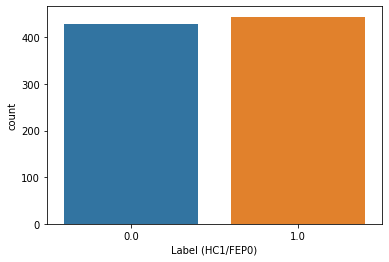

In [ ]:
sns.countplot(dataset["Label (HC1/FEP0)"])

In [ ]:
dataset['Label (HC1/FEP0)'].describe()

count    872.000000
mean       0.509174
std        0.500203
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Label (HC1/FEP0), dtype: float64

In [ ]:
# #Function to draw pairplots
# sns.pairplot(dataset,hue='Label (HC1/FEP0)')

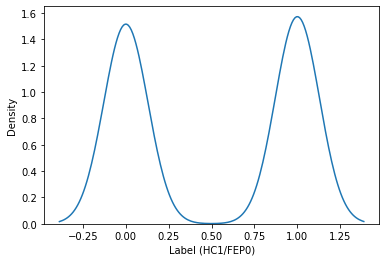

In [ ]:
sns.kdeplot(dataset['Label (HC1/FEP0)'])

Selecting Features and dependent varaible

In [ ]:
features = ['Gender (M0/F1)','Age','Mean_Euler','lh_bankssts_thickness','lh_caudalanteriorcingulate_thickness','lh_caudalmiddlefrontal_thickness','lh_cuneus_thickness','lh_entorhinal_thickness','lh_fusiform_thickness','lh_inferiorparietal_thickness','lh_inferiortemporal_thickness','lh_isthmuscingulate_thickness','lh_lateraloccipital_thickness','lh_lateralorbitofrontal_thickness','lh_lingual_thickness','lh_medialorbitofrontal_thickness','lh_middletemporal_thickness','lh_parahippocampal_thickness','lh_paracentral_thickness','lh_parsopercularis_thickness','lh_parsorbitalis_thickness','lh_parstriangularis_thickness','lh_pericalcarine_thickness','lh_postcentral_thickness','lh_posteriorcingulate_thickness','lh_precentral_thickness','lh_precuneus_thickness','lh_rostralanteriorcingulate_thickness','lh_rostralmiddlefrontal_thickness','lh_superiorfrontal_thickness','lh_superiorparietal_thickness','lh_superiortemporal_thickness','lh_supramarginal_thickness','lh_frontalpole_thickness','lh_temporalpole_thickness','lh_transversetemporal_thickness','lh_insula_thickness','rh_bankssts_thickness','rh_caudalanteriorcingulate_thickness','rh_caudalmiddlefrontal_thickness','rh_cuneus_thickness','rh_entorhinal_thickness','rh_fusiform_thickness','rh_inferiorparietal_thickness','rh_inferiortemporal_thickness','rh_isthmuscingulate_thickness','rh_lateraloccipital_thickness','rh_lateralorbitofrontal_thickness','rh_lingual_thickness','rh_medialorbitofrontal_thickness','rh_middletemporal_thickness','rh_parahippocampal_thickness','rh_paracentral_thickness','rh_parsopercularis_thickness','rh_parsorbitalis_thickness','rh_parstriangularis_thickness','rh_pericalcarine_thickness','rh_postcentral_thickness','rh_posteriorcingulate_thickness','rh_precentral_thickness','rh_precuneus_thickness','rh_rostralanteriorcingulate_thickness','rh_rostralmiddlefrontal_thickness','rh_superiorfrontal_thickness','rh_superiorparietal_thickness','rh_superiortemporal_thickness','rh_supramarginal_thickness','rh_frontalpole_thickness','rh_temporalpole_thickness','rh_transversetemporal_thickness','rh_insula_thickness','lh_bankssts_volume','lh_caudalanteriorcingulate_volume','lh_caudalmiddlefrontal_volume','lh_cuneus_volume','lh_entorhinal_volume','lh_fusiform_volume','lh_inferiorparietal_volume','lh_inferiortemporal_volume','lh_isthmuscingulate_volume','lh_lateraloccipital_volume','lh_lateralorbitofrontal_volume','lh_lingual_volume','lh_medialorbitofrontal_volume','lh_middletemporal_volume','lh_parahippocampal_volume','lh_paracentral_volume','lh_parsopercularis_volume','lh_parsorbitalis_volume','lh_parstriangularis_volume','lh_pericalcarine_volume','lh_postcentral_volume','lh_posteriorcingulate_volume','lh_precentral_volume','lh_precuneus_volume','lh_rostralanteriorcingulate_volume','lh_rostralmiddlefrontal_volume','lh_superiorfrontal_volume','lh_superiorparietal_volume','lh_superiortemporal_volume','lh_supramarginal_volume','lh_frontalpole_volume','lh_temporalpole_volume','lh_transversetemporal_volume','lh_insula_volume','rh_bankssts_volume','rh_caudalanteriorcingulate_volume','rh_caudalmiddlefrontal_volume','rh_cuneus_volume','rh_entorhinal_volume','rh_fusiform_volume','rh_inferiorparietal_volume','rh_inferiortemporal_volume','rh_isthmuscingulate_volume','rh_lateraloccipital_volume','rh_lateralorbitofrontal_volume','rh_lingual_volume','rh_medialorbitofrontal_volume','rh_middletemporal_volume','rh_parahippocampal_volume','rh_paracentral_volume','rh_parsopercularis_volume','rh_parsorbitalis_volume','rh_parstriangularis_volume','rh_pericalcarine_volume','rh_postcentral_volume','rh_posteriorcingulate_volume','rh_precentral_volume','rh_precuneus_volume','rh_rostralanteriorcingulate_volume','rh_rostralmiddlefrontal_volume','rh_superiorfrontal_volume','rh_superiorparietal_volume','rh_superiortemporal_volume','rh_supramarginal_volume','rh_frontalpole_volume','rh_temporalpole_volume','rh_transversetemporal_volume','rh_insula_volume']
X = dataset[features].values
y = dataset['Label (HC1/FEP0)'].values

In [ ]:
print (X)

[[ 1.00000000e+00  2.38576318e+01 -2.10000000e+01 ...  2.12900000e+03
   9.46000000e+02  5.90900000e+03]
 [ 0.00000000e+00  2.89527721e+01 -3.30000000e+01 ...  2.59100000e+03
   1.24900000e+03  8.49900000e+03]
 [ 0.00000000e+00  2.01998631e+01 -5.50000000e+01 ...  2.17800000e+03
   1.25700000e+03  8.01500000e+03]
 ...
 [ 1.00000000e+00  2.49694440e+01 -8.31000000e+02 ...  1.94900000e+03
   4.49000000e+02  5.08900000e+03]
 [ 1.00000000e+00  1.80722220e+01 -1.93000000e+02 ...  2.75900000e+03
   8.05000000e+02  8.82300000e+03]
 [ 0.00000000e+00  2.21805560e+01 -2.40000000e+02 ...  1.64000000e+03
   8.73000000e+02  7.29900000e+03]]


In [ ]:
print (y)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. nan nan
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  1

1.0    444
0.0    428
Name: Label (HC1/FEP0), dtype: int64


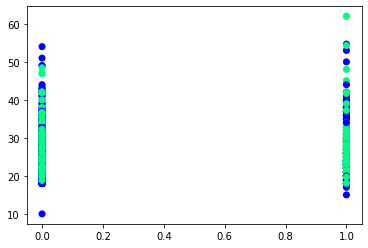

In [ ]:
from sklearn.svm import SVC
print(dataset['Label (HC1/FEP0)'].value_counts())
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

In [ ]:
# dataset.hist(bins = 50, figsize = (20,15))
# plt.show()

In [ ]:
# Standardize the features
X = StandardScaler().fit_transform(X)

FEATURE EXTRACTION

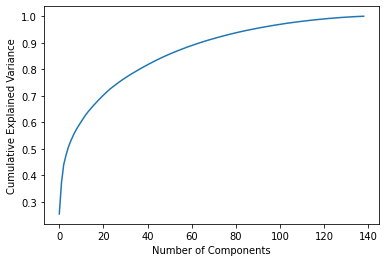

In [ ]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');


In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100
total_var

37.27422297373375

In [ ]:
# Instantiate PCA
pca = PCA(n_components=0.70)
# Fit PCA to features
principalComponents = pca.fit_transform(X)

In [ ]:
pca.n_components_

21

Updated dataset from principal components 

In [ ]:
processed_data = pd.DataFrame(data = principalComponents, 
                  columns = ['PC1', 'PC2','PC3','PC4','PC5', 'PC6','PC7','PC8','PC9', 'PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21'])

target = pd.Series(dataset['Label (HC1/FEP0)'], name='Label (HC1/FEP0)')

reduced_ds = pd.concat([processed_data, target], axis=1)
reduced_ds.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,Label (HC1/FEP0)
0,8.680443,-1.434000,-1.550501,2.692734,0.294270,-0.205568,-1.411814,1.950388,-0.418712,1.147799,...,0.670146,0.102263,-0.640246,2.033667,1.114982,-0.054952,-1.418884,0.509538,0.111019,0.0
1,-11.368216,-2.693670,1.747263,2.325784,1.027765,-1.488429,0.789198,0.900871,-0.034739,0.123590,...,-0.933315,-2.187682,1.176337,2.914761,0.017142,-1.065872,-0.408715,-2.151222,-0.295133,0.0
2,-2.712432,0.562113,-1.070003,0.897307,1.462167,-0.025744,-0.698440,-0.338348,0.716585,1.149114,...,-0.616242,-0.795637,-0.008219,2.316165,-0.525763,1.161895,-2.363261,-1.245668,0.421012,0.0
3,-5.842099,2.053741,-0.779332,0.191526,-1.717909,0.776674,-1.434996,-1.508268,1.705482,0.560377,...,1.127076,0.641000,-2.591420,0.836754,0.179166,-0.193155,0.787902,-1.326230,0.160410,0.0
4,7.331061,0.700149,-0.136095,0.776992,0.679290,-0.650312,-1.297307,0.129018,1.752110,-0.762741,...,2.511248,0.398601,-1.534315,-0.959030,-0.904964,0.367774,1.064105,0.101752,0.588388,0.0


Variance explained by priciple components

In [ ]:
print('Variance of each component:', pca.explained_variance_ratio_)
final_variance = round(sum(list(pca.explained_variance_ratio_))*100,3)
print('\n Total Variance Explained:', final_variance)

Variance of each component: [0.25470734 0.11803489 0.06791471 0.03368935 0.02934545 0.02213404
 0.01888319 0.01758866 0.01461104 0.01351828 0.01323101 0.01269091
 0.01191787 0.01106213 0.01005018 0.00952111 0.00920219 0.00907394
 0.00881202 0.00843973 0.0080607 ]

 Total Variance Explained: 70.249


Outliers Ditection

In [ ]:
#Function to detect outliers
from collections import Counter
def multiple_detect_outliers(dataset,features):
    outlier_indices = []

    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(dataset[c],25) 
        # 3rd quartile
        Q3 = np.percentile(dataset[c],75) 
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = dataset[(dataset[c] < Q1 - outlier_step) | (dataset[c] > Q3 + outlier_step)].index

        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)
    
    return multiple_outliers
reduced_ds.loc[multiple_detect_outliers(reduced_ds,['PC1', 'PC2','PC3','PC4','PC5', 'PC6','PC7','PC8','PC9', 'PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21'])]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,Label (HC1/FEP0)
18,16.109611,-4.428749,-2.105147,-2.469989,-1.590483,2.699474,1.499294,-0.110155,-0.574887,3.172197,...,0.375601,-1.166296,2.249726,1.522548,0.312442,-1.401907,-0.349464,0.997219,0.672364,0.0
447,16.540030,-6.870634,0.537052,1.795018,0.012319,-1.494531,-0.962508,-2.821816,-1.318295,-3.783616,...,0.486455,-0.586866,0.492631,0.632485,-1.308388,1.447656,-0.082208,-1.527777,-1.475392,1.0
619,18.761077,1.707451,-2.941223,0.177062,0.529602,0.691392,0.323522,0.963872,-1.281099,-1.514909,...,-0.875316,1.432035,-2.815001,-0.101599,0.116268,0.002517,-2.728967,-0.180325,0.944552,0.0
621,25.887994,14.904072,1.800233,-0.182198,-5.819947,1.401282,-5.084739,8.163027,-3.282419,3.293028,...,5.811809,-3.822751,-0.690759,0.306329,-1.905357,-2.413894,0.266822,-1.181034,-2.989692,0.0
638,18.397904,10.683636,-4.075790,-0.320250,-1.195206,2.912985,0.295576,-2.688962,1.111114,-1.272571,...,-4.621579,1.239302,0.604591,-1.792606,-2.181017,-0.207202,-0.162092,-0.190455,0.249135,0.0
639,19.536330,18.460754,-1.210680,0.730234,-1.976607,1.019585,-1.333936,0.617101,-0.650780,-0.257625,...,-1.389803,-0.129388,-0.818178,-0.372887,-0.948325,0.282204,-0.108545,-0.929663,0.867187,0.0
656,20.997281,11.756972,-0.228546,-1.218538,-0.259949,2.102119,1.322434,5.268489,-2.337886,1.650247,...,-2.237626,-1.052891,-3.115377,0.793718,-0.507159,0.774041,-1.314832,-1.134885,2.786849,0.0
662,17.071416,9.259046,0.914106,-2.363473,-0.202658,1.516086,2.747738,3.061293,0.738479,2.612727,...,-1.194656,0.170078,-0.290573,-2.084541,1.128287,0.182592,1.210486,-2.661899,1.375371,0.0
805,16.993488,2.393265,7.906310,5.600712,-2.892871,-5.948351,2.543996,-7.867917,-3.494315,7.138913,...,-0.228280,0.652541,-2.217789,2.652282,-2.905451,0.341371,3.539904,2.338441,-1.620825,0.0
396,-5.609665,-11.067836,1.741039,-0.073165,-2.595929,2.318644,0.422704,-3.677729,-0.584246,1.154288,...,-1.391800,0.212551,1.511595,-0.158901,1.754670,-0.879943,0.602936,-0.820223,-1.083441,1.0


Drop Outliers and Null Values

In [ ]:
reduced_ds = reduced_ds.drop(multiple_detect_outliers(reduced_ds,['PC1', 'PC2','PC3','PC4','PC5', 'PC6','PC7','PC8','PC9', 'PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21']),axis = 0).reset_index(drop = True)
reduced_ds = reduced_ds.dropna(subset=['Label (HC1/FEP0)'])


Correlation matrix

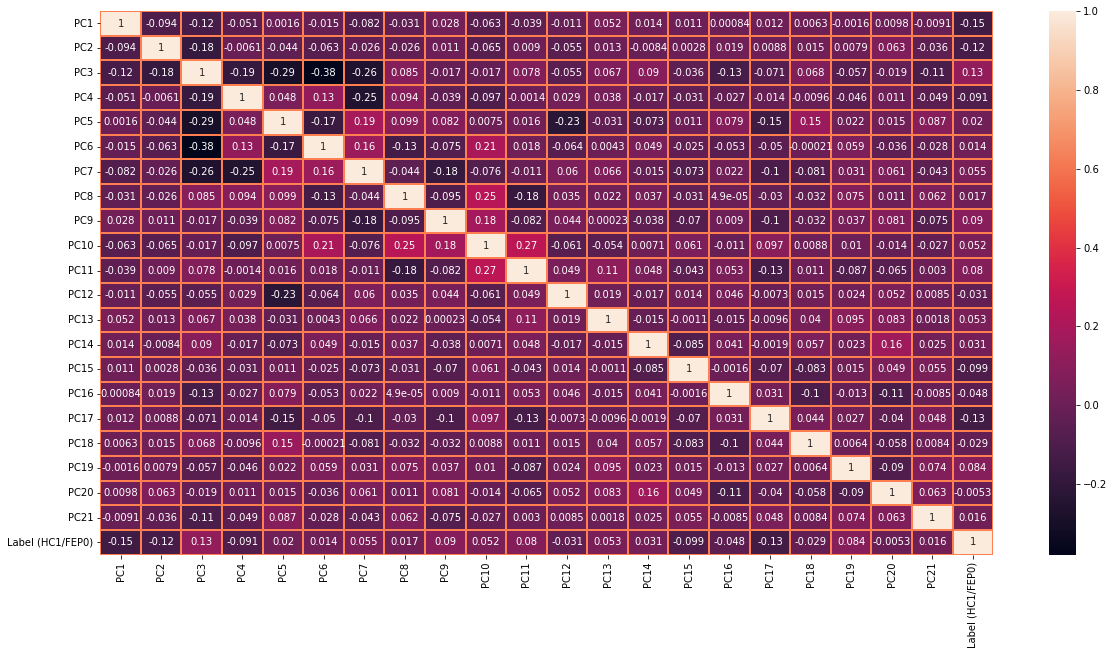

In [ ]:
heatmap=reduced_ds.corr()
ax= plt.figure(figsize=(20,10))
sns.heatmap(heatmap,linewidths=1,linecolor='coral',annot=True)

Deaclaring features and independent variables after PCA

In [ ]:
components = ['PC1', 'PC2','PC3','PC4','PC5', 'PC6','PC7','PC8','PC9', 'PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21']
x = reduced_ds[components].values
y = reduced_ds['Label (HC1/FEP0)'].values

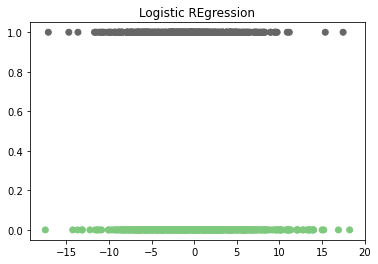

In [ ]:
plt.scatter(reduced_ds['PC1'], y, c=y, cmap='Accent')
plt.title('Logistic REgression')
plt.show()

Splitting the dataset into the Training set and Test set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=2, test_size=0.30)

In [ ]:
print("Training data rows: ",x_train.shape)
print("Testing data rows: ",x_test.shape)

Training data rows:  (578, 21)
Testing data rows:  (248, 21)


LogisticRegression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = log_reg.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[68, 57],
       [37, 86]])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6209677419354839

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.5162276422764231

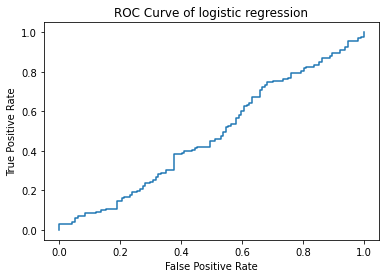

In [ ]:
from sklearn import metrics
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of logistic regression')
plt.show()

K-NN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[55 70]
 [33 90]]


In [ ]:
accuracy_score(y_test, y_pred)

0.5846774193548387

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

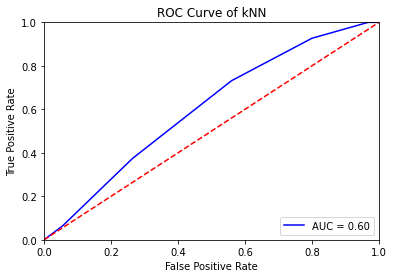

In [ ]:
y_scores = classifier.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

Decision-Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

dt_classifier = DecisionTreeClassifier(random_state=40)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=40)

In [ ]:
dt_classifier.score(x_train, y_train)

1.0

In [ ]:
dt_classifier.score(x_test, y_test)

0.5887096774193549

In [ ]:
dt_y_pred = dt_classifier.predict(x_test)
dt_classifier.predict_proba(x_test)

In [ ]:
y_pred = dt_classifier.predict_proba(x_test)[:,1]

In [ ]:
confusion_matrix(y_test,y_pred)

array([[73, 52],
       [50, 73]])

In [ ]:
accuracy_score(y_test, y_pred)

0.5887096774193549

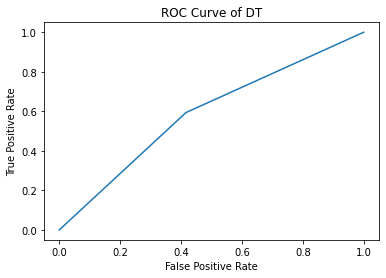

In [ ]:
from sklearn import metrics
y_pred_proba = dt_classifier.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

Neural Network

In [ ]:
train, test = train_test_split(reduced_ds,random_state=1, test_size=0.30)
x_training = train[train.columns[2:21]]
y_training = train['Label (HC1/FEP0)']
x_testing = test[test.columns[2:21]]
y_testing = test['Label (HC1/FEP0)']

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(5,5,5), max_iter=1000)
MLP.fit(x_training,y_training.values.ravel())

MLPClassifier(hidden_layer_sizes=(5, 5, 5), max_iter=1000)

In [ ]:
predictions = MLP.predict(x_testing)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_testing,predictions)

array([[55, 61],
       [64, 68]])

In [ ]:
accuracy_score(y_testing, predictions)

0.4959677419354839

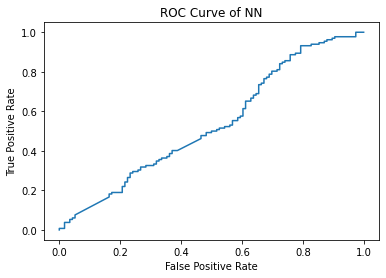

In [ ]:
from sklearn import metrics
y_pred_proba = MLP.predict_proba(x_testing)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_testing,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of NN')
plt.show()

SVM

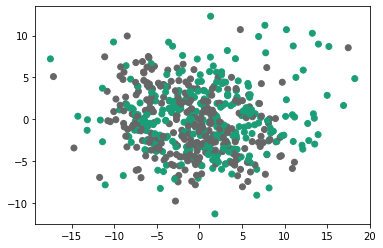

In [ ]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=11, test_size=0.30)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='Dark2')

In [ ]:
svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

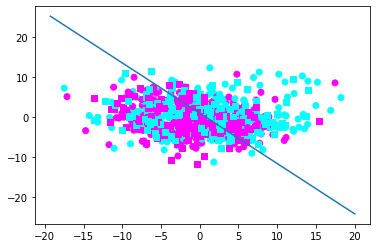

In [ ]:
plt.scatter(X_train[:, 0], X_train[:,1], c=y_train, cmap='cool')
ax=plt.gca()
xlim = ax.get_xlim()
ax.scatter(X_test[:, 0], X_test[:,1], c=y_test, cmap='cool', marker='s')
w = svc.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(xlim[0],xlim[1])
yy = a*xx-(svc.intercept_[0]/w[1])
plt.plot(xx,yy)
plt.show()

In [ ]:
pred_y=svc.predict(X_test)

In [ ]:
confusion_matrix(y_test, pred_y)

array([[67, 50],
       [48, 83]])

In [ ]:
accuracy_score(y_test, pred_y)

0.6048387096774194

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


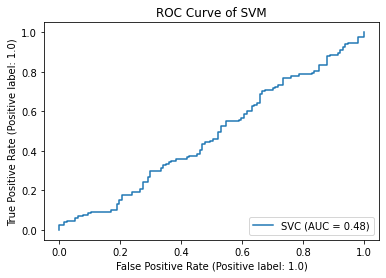

In [ ]:
metrics.plot_roc_curve(svc, x_test, y_test)
plt.title('ROC Curve of SVM')
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 40)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=40)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[54 63]
 [69 62]]


In [ ]:
accuracy_score(y_test, y_pred)

0.46774193548387094